# Overview
**The dataset contains transactions made by credit cards in September 2013 by European cardholders.
This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced.**

**It contains only numerical input variables Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data.**

**Given the class imbalance ratio, we recommend measuring the accuracy using the Area Under the Precision-Recall Curve (AUPRC). Confusion matrix accuracy is not meaningful for unbalanced classification.**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
# Reading an excel file 
Credit_Card_Defaulters=pd.read_excel("default_of_credit_card_clients.xls")

In [3]:
Credit_Card_Defaulters

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
2,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,29996,220000,1,3,1,39,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29997,29997,150000,1,3,2,43,-1,-1,-1,-1,...,8979,5190,0,1837,3526,8998,129,0,0,0
29998,29998,30000,1,2,2,37,4,3,2,-1,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29999,29999,80000,1,3,1,41,1,-1,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


In [4]:
# Checking the datatype of the features.
Credit_Card_Defaulters.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30001 entries, 0 to 30000
Data columns (total 25 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  30001 non-null  object
 1   X1          30001 non-null  object
 2   X2          30001 non-null  object
 3   X3          30001 non-null  object
 4   X4          30001 non-null  object
 5   X5          30001 non-null  object
 6   X6          30001 non-null  object
 7   X7          30001 non-null  object
 8   X8          30001 non-null  object
 9   X9          30001 non-null  object
 10  X10         30001 non-null  object
 11  X11         30001 non-null  object
 12  X12         30001 non-null  object
 13  X13         30001 non-null  object
 14  X14         30001 non-null  object
 15  X15         30001 non-null  object
 16  X16         30001 non-null  object
 17  X17         30001 non-null  object
 18  X18         30001 non-null  object
 19  X19         30001 non-null  object
 20  X20   

In [5]:
# Deleting the first row and making the second row as column names.
Credit_Card_Defaulters=Credit_Card_Defaulters.rename(columns=Credit_Card_Defaulters.iloc[0]).loc[1:]

In [6]:
Credit_Card_Defaulters

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
2,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,29996,220000,1,3,1,39,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29997,29997,150000,1,3,2,43,-1,-1,-1,-1,...,8979,5190,0,1837,3526,8998,129,0,0,0
29998,29998,30000,1,2,2,37,4,3,2,-1,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29999,29999,80000,1,3,1,41,1,-1,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


In [7]:
# fetching first five entries of dataset.
Credit_Card_Defaulters.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
2,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [8]:
# changing the name of the column.
Credit_Card_Defaulters.rename(columns={"default payment next month":"default_pay"},inplace = True)

In [9]:
# Changing the Datatyoe of columns to int.
Credit_Card_Defaulters[['SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']]=Credit_Card_Defaulters[['SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']].astype("int")

In [10]:
# Changing the Datatype of columns to float.
Credit_Card_Defaulters[['LIMIT_BAL','BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']]=Credit_Card_Defaulters[['LIMIT_BAL','BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']].astype("float")

In [11]:
# Fetching the column names.
print(Credit_Card_Defaulters.columns)

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default_pay'],
      dtype='object')


In [12]:
# Printing the shape of the dataset.
Rows,Columns = Credit_Card_Defaulters.shape
print(f"There are {Rows} rows and {Columns} columns in this dataset.")

There are 30000 rows and 25 columns in this dataset.


In [13]:
# Droping the column (ID)
Credit_Card_Defaulters=Credit_Card_Defaulters.drop(['ID'],axis = 1)

In [14]:
Credit_Card_Defaulters

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_pay
1,20000.0,2,2,1,24,2,2,-1,-1,-2,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
2,120000.0,2,2,2,26,-1,2,0,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
3,90000.0,2,2,2,34,0,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
4,50000.0,2,2,1,37,0,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
5,50000.0,1,2,1,57,-1,0,-1,0,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,220000.0,1,3,1,39,0,0,0,0,0,...,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0
29997,150000.0,1,3,2,43,-1,-1,-1,-1,0,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0
29998,30000.0,1,2,2,37,4,3,2,-1,0,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1
29999,80000.0,1,3,1,41,1,-1,0,0,0,...,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1


In [15]:
Credit_Card_Defaulters[['default_pay']]=Credit_Card_Defaulters[['default_pay']].astype("int")

In [16]:
# After converting all datatype,checking the info again.
Credit_Card_Defaulters.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 1 to 30000
Data columns (total 24 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   LIMIT_BAL    30000 non-null  float64
 1   SEX          30000 non-null  int32  
 2   EDUCATION    30000 non-null  int32  
 3   MARRIAGE     30000 non-null  int32  
 4   AGE          30000 non-null  int32  
 5   PAY_0        30000 non-null  int32  
 6   PAY_2        30000 non-null  int32  
 7   PAY_3        30000 non-null  int32  
 8   PAY_4        30000 non-null  int32  
 9   PAY_5        30000 non-null  int32  
 10  PAY_6        30000 non-null  int32  
 11  BILL_AMT1    30000 non-null  float64
 12  BILL_AMT2    30000 non-null  float64
 13  BILL_AMT3    30000 non-null  float64
 14  BILL_AMT4    30000 non-null  float64
 15  BILL_AMT5    30000 non-null  float64
 16  BILL_AMT6    30000 non-null  float64
 17  PAY_AMT1     30000 non-null  float64
 18  PAY_AMT2     30000 non-null  float64
 19  PAY_

In [17]:
# Checking the missing values.
Credit_Card_Defaulters.isna().sum()  

LIMIT_BAL      0
SEX            0
EDUCATION      0
MARRIAGE       0
AGE            0
PAY_0          0
PAY_2          0
PAY_3          0
PAY_4          0
PAY_5          0
PAY_6          0
BILL_AMT1      0
BILL_AMT2      0
BILL_AMT3      0
BILL_AMT4      0
BILL_AMT5      0
BILL_AMT6      0
PAY_AMT1       0
PAY_AMT2       0
PAY_AMT3       0
PAY_AMT4       0
PAY_AMT5       0
PAY_AMT6       0
default_pay    0
dtype: int64

**we can see that all the 24 columns which indicates that there is no missing value.**

In [18]:
Credit_Card_Defaulters.shape

(30000, 24)

In [19]:
# Dataset description after tranposing it.
Credit_Card_Defaulters.describe().T

,count,mean,std,min,25%,50%,75%,max
LIMIT_BAL,30000.0,167484.322667,129747.661567,10000.0,50000.00,140000.0,240000.00,1000000.0
SEX,30000.0,1.603733,0.489129,1.0,1.00,2.0,2.00,2.0
EDUCATION,30000.0,1.853133,0.790349,0.0,1.00,2.0,2.00,6.0
MARRIAGE,30000.0,1.551867,0.521970,0.0,1.00,2.0,2.00,3.0
AGE,30000.0,35.485500,9.217904,21.0,28.00,34.0,41.00,79.0
PAY_0,30000.0,-0.016700,1.123802,-2.0,-1.00,0.0,0.00,8.0
PAY_2,30000.0,-0.133767,1.197186,-2.0,-1.00,0.0,0.00,8.0
PAY_3,30000.0,-0.166200,1.196868,-2.0,-1.00,0.0,0.00,8.0
PAY_4,30000.0,-0.220667,1.169139,-2.0,-1.00,0.0,0.00,8.0
PAY_5,30000.0,-0.266200,1.133187,-2.0,-1.00,0.0,0.00,8.0


In [20]:
# Checking the duplicated values in the dataset.
Credit_Card_Defaulters[Credit_Card_Defaulters.duplicated()]

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_pay
1981,150000.0,2,1,1,38,1,-2,-2,-2,-2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4586,150000.0,2,1,1,31,1,-2,-2,-2,-2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
6023,210000.0,2,1,2,39,1,-2,-2,-2,-2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
6467,210000.0,2,2,1,49,1,-2,-2,-2,-2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
7320,500000.0,1,1,1,43,1,-2,-2,-2,-2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
8321,360000.0,1,2,1,41,1,-2,-2,-2,-2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
10251,50000.0,1,2,2,26,1,-2,-2,-2,-2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
13107,360000.0,2,1,1,49,1,-2,-2,-2,-2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
14295,20000.0,1,2,2,24,2,2,4,4,4,...,1650.0,1650.0,1650.0,0.0,0.0,0.0,0.0,0.0,0.0,1
15459,160000.0,1,2,2,28,-2,-2,-2,-2,-2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [21]:
# Dropped duplicae values.
Credit_Card_Defaulters = Credit_Card_Defaulters.drop_duplicates()

In [22]:
Credit_Card_Defaulters[Credit_Card_Defaulters.duplicated()]

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_pay


<AxesSubplot:title={'center':'Default Payment Next Month'}, xlabel='default_pay', ylabel='count'>

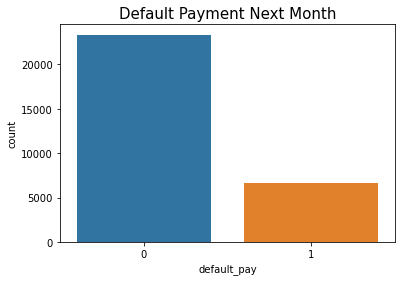

In [23]:
# Countplot of the target variable.
plt.title("Default Payment Next Month", fontsize=15)
sns.countplot(x = Credit_Card_Defaulters["default_pay"])

In [24]:
# Calculating the probablity of both class.
Default_pay_probability = (Credit_Card_Defaulters.default_pay.value_counts(normalize=True)*100)

In [25]:
Default_pay_probability

0    77.874187
1    22.125813
Name: default_pay, dtype: float64

**As we can see above that the dataset consists of 77% of clients are not expected to default payment whereas 23% clients are expected to default the payment.**

In [26]:
client_background = list(Credit_Card_Defaulters.columns[0:5])
pay = list(Credit_Card_Defaulters.columns[5:11])
bill_amt = list(Credit_Card_Defaulters.columns[11:17])
pay_amt = list(Credit_Card_Defaulters.columns[17:23])

In [27]:
def draw_histograms(Credit_Card_Defaulters, variables, n_rows, n_cols, bin_size):
    fig=plt.figure()
    for i, var_name in enumerate(variables):
        ax=fig.add_subplot(n_rows,n_cols,i+1)
        Credit_Card_Defaulters[Credit_Card_Defaulters["default_pay"]==1][var_name].plot.hist(color='red', label='Default', alpha=0.7, density=True, ax=ax, bins=bin_size)
        Credit_Card_Defaulters[Credit_Card_Defaulters["default_pay"]==0][var_name].plot.hist(color='blue', label='Not Default', alpha=0.7, density=True, ax=ax, bins=bin_size)
        ax.set_title(var_name)
        ax.set_ylabel('Probability')
    fig.tight_layout()

    fig.legend(['Default', 'Not Default'], loc='upper right', bbox_to_anchor=(1.3, 1.1))
    plt.show()

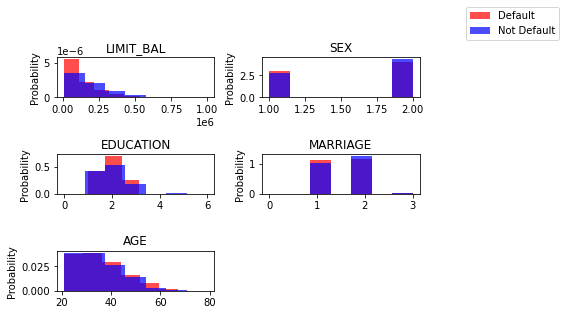

In [28]:
draw_histograms(Credit_Card_Defaulters,client_background, 3,2,7)

**Age and Limit_balance is right-skewed.**

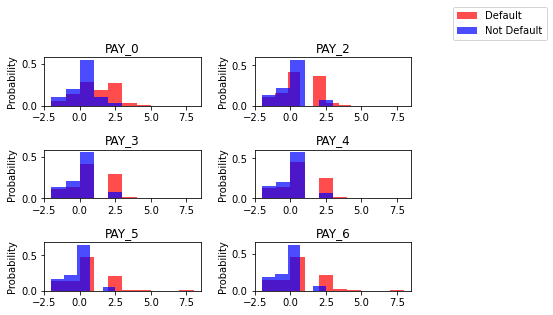

In [29]:
draw_histograms(Credit_Card_Defaulters,pay, 3,2,10)

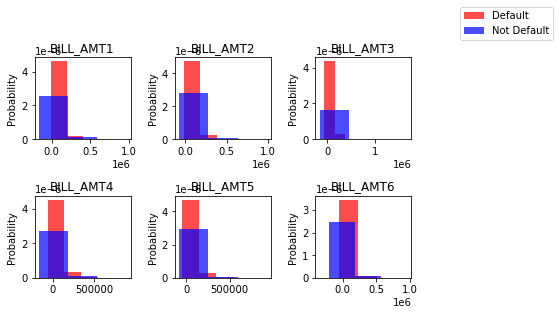

In [30]:
draw_histograms(Credit_Card_Defaulters,bill_amt, 2,3,3)

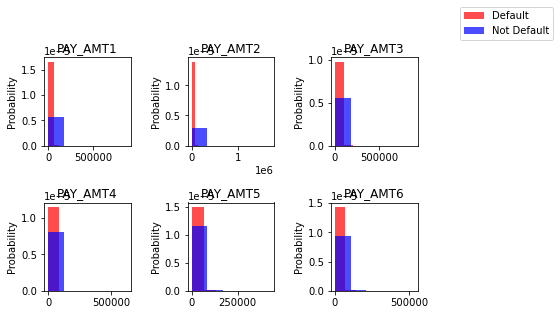

In [31]:
draw_histograms(Credit_Card_Defaulters,pay_amt, 2,3,5)

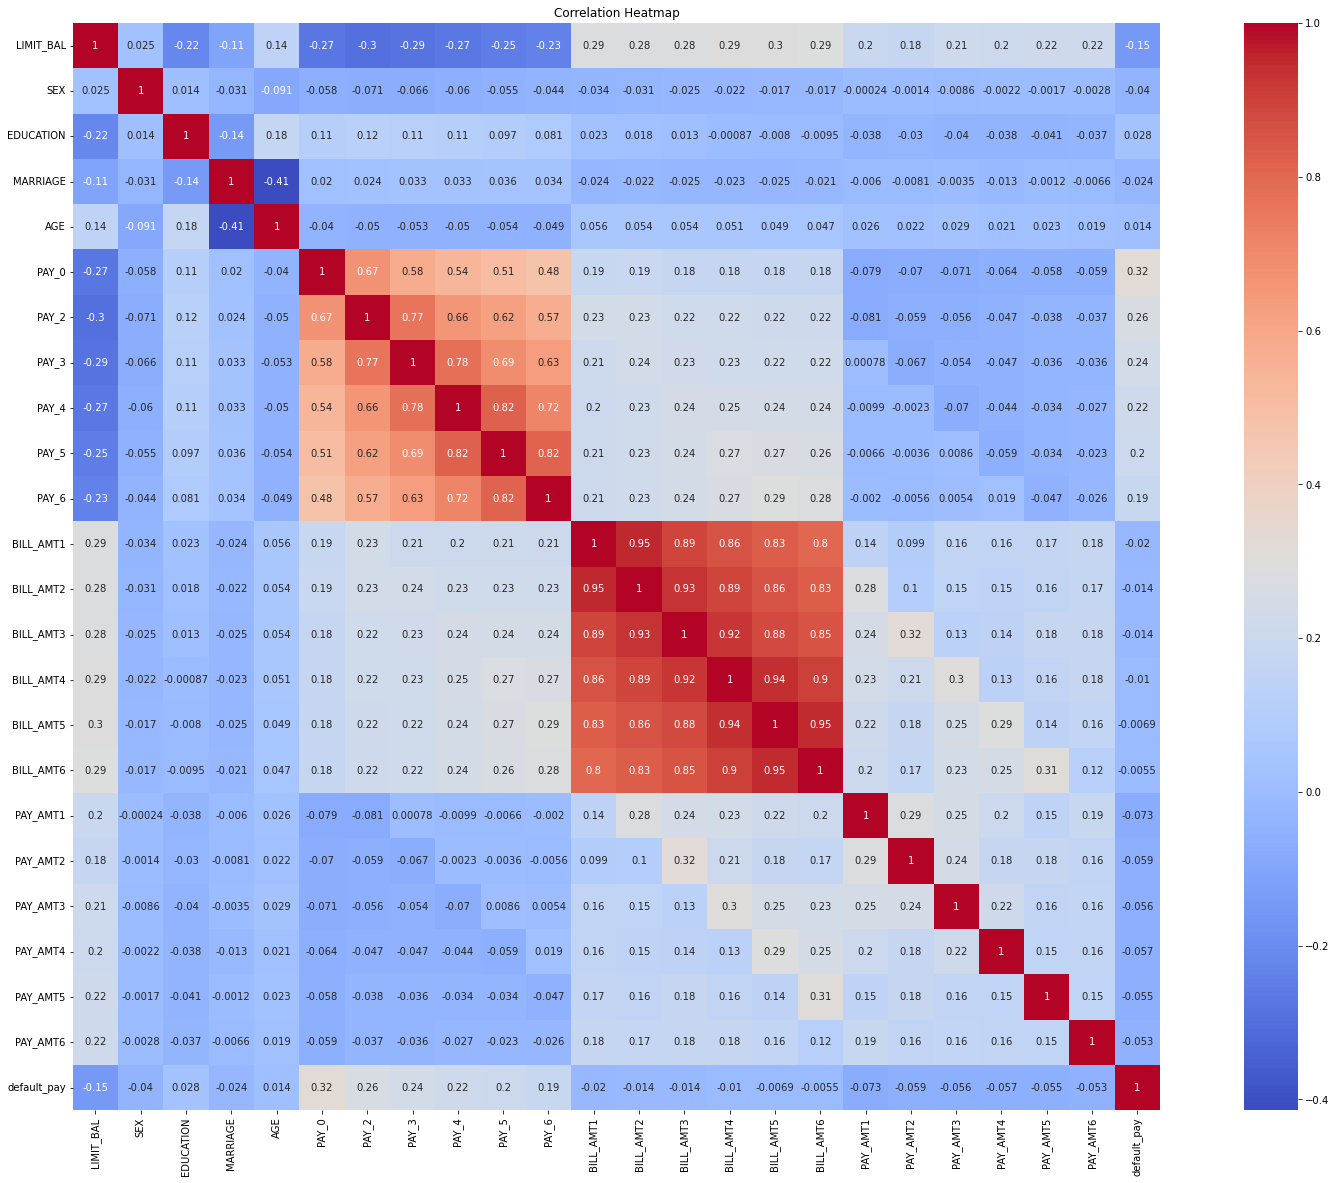

In [32]:
corr = np.corrcoef(Credit_Card_Defaulters, rowvar=False)
plt.subplots(figsize=(30,20))
sns.heatmap(corr, annot=True, cmap="coolwarm", square=True, xticklabels=Credit_Card_Defaulters.columns, yticklabels=Credit_Card_Defaulters.columns)
plt.title("Correlation Heatmap")
plt.show()

**Correlation is high among PAY_0,2,3,4,5,6 and BILL_AMT1,2,3,4,5,6.**

In [33]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_auc_score, plot_confusion_matrix, plot_precision_recall_curve

In [34]:
# Categorising the dataset into two categories.
Independent_var = Credit_Card_Defaulters.drop(['default_pay'], axis=1)
Dependent_var = Credit_Card_Defaulters['default_pay']
Independent_var.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
1,20000.0,2,2,1,24,2,2,-1,-1,-2,...,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0
2,120000.0,2,2,2,26,-1,2,0,0,0,...,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0
3,90000.0,2,2,2,34,0,0,0,0,0,...,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0
4,50000.0,2,2,1,37,0,0,0,0,0,...,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0
5,50000.0,1,2,1,57,-1,0,-1,0,0,...,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0


In [35]:
Independent_var_train,Independent_var_test,Dependent_var_train,Dependent_var_test= train_test_split(Independent_var,Dependent_var,test_size=0.20,random_state=42)

In [36]:
# Feature Engineering 
Scaler= StandardScaler()
Independent_var_train = Scaler.fit_transform(Independent_var_train)
Independent_var_test = Scaler.transform(Independent_var_test)

In [37]:
Independent_var_train

array([[ 1.33498192, -1.23424812, -1.08197137, ...,  0.46304882,
         0.46167884,  0.39411887],
       [ 0.56341877,  0.81020986,  0.18399005, ..., -0.31212553,
        -0.31018261, -0.29967615],
       [ 0.33194982,  0.81020986, -1.08197137, ...,  0.01086379,
         3.05661274,  0.56756763],
       ...,
       [-0.90255122, -1.23424812, -1.08197137, ..., -0.31212553,
        -0.31018261, -0.29967615],
       [ 0.87204403,  0.81020986,  0.18399005, ...,  0.18831411,
         0.1084879 ,  0.34983162],
       [ 0.10048088,  0.81020986,  0.18399005, ..., -0.31212553,
        -0.31018261, -0.29967615]])

In [38]:
Classifier = LogisticRegression()
Classifier.fit(Independent_var_train,Dependent_var_train)

LogisticRegression()

In [39]:
Classifier.coef_

array([[-0.08994942, -0.04238819, -0.0756894 , -0.09523552,  0.06443893,
         0.65549336,  0.09206364,  0.09316447,  0.03558264,  0.01852069,
         0.0207971 , -0.51434657,  0.30316705,  0.05120035,  0.0792214 ,
        -0.16051065,  0.16657425, -0.24142507, -0.19877635, -0.05094682,
        -0.05964716, -0.0670371 , -0.04951813]])

In [40]:
Classifier.intercept_

array([-1.46916001])

In [41]:
pred = Classifier.predict(Independent_var_test)

LogisticRegression model's accuracy: 0.8076088770231937
              precision    recall  f1-score   support

           0       0.82      0.97      0.89      4673
           1       0.70      0.22      0.34      1320

    accuracy                           0.81      5993
   macro avg       0.76      0.60      0.61      5993
weighted avg       0.79      0.81      0.77      5993

confusion matrix of logistic regression


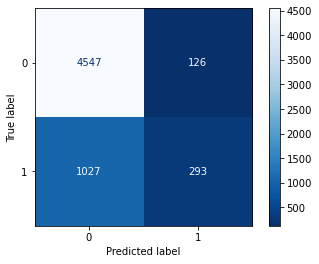

In [42]:
print("LogisticRegression model's accuracy:", accuracy_score(Dependent_var_test, pred))
print(classification_report(Dependent_var_test, pred))
print('confusion matrix of logistic regression')
plot_confusion_matrix(Classifier, Independent_var_test,Dependent_var_test, cmap="Blues_r")

Decision Tree Accuracy : 0.8081094610378775
              precision    recall  f1-score   support

           0       0.82      0.96      0.89      4673
           1       0.66      0.27      0.38      1320

    accuracy                           0.81      5993
   macro avg       0.74      0.62      0.64      5993
weighted avg       0.79      0.81      0.78      5993

confusion matrix of decision tree


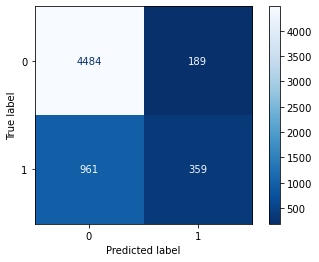

In [43]:
Tree = DecisionTreeClassifier(criterion= 'gini', max_depth= 7, 
                                     max_features= 9, min_samples_leaf= 2, 
                                     random_state=0)
Tree.fit(Independent_var_train, Dependent_var_train)
pred_tree = Tree.predict(Independent_var_test)
print('Decision Tree Accuracy :', accuracy_score(Dependent_var_test,pred_tree))

print(classification_report(Dependent_var_test, pred_tree))

print('confusion matrix of decision tree')
plot_confusion_matrix(Tree, Independent_var_test, Dependent_var_test, cmap="Blues_r")

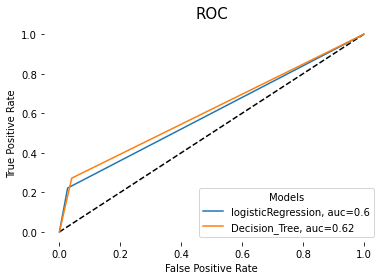

In [44]:
# logisticRegression model 
pred= Classifier.predict(Independent_var_test)
fpr1, tpr1,_ = metrics.roc_curve(Dependent_var_test,  pred)
auc1 = metrics.roc_auc_score(Dependent_var_test, pred)

# decision tree model:
pred_tree = Tree.predict(Independent_var_test)
fpr2, tpr2, _ = metrics.roc_curve(Dependent_var_test,  pred_tree)
auc2 = metrics.roc_auc_score(Dependent_var_test, pred_tree)

plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr1,tpr1,label="logisticRegression, auc="+str(round(auc1,2)))
plt.plot(fpr2,tpr2,label="Decision_Tree, auc="+str(round(auc2,2)))

plt.legend(loc=4, title='Models', facecolor='white')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC', size=15)
plt.box(False)
plt.show()
